# Naive Bayes Classifiers
Naive Bayes classifiers are a family of classifiers that are quite similar to the linear
models discussed in the previous section. However, they tend to be even faster in
training. The price paid for this efficiency is that naive Bayes models often provide
generalization performance that is slightly worse than that of linear classifiers like
LogisticRegression and LinearSVC.

The reason that naive Bayes models are so efficient is that they learn parameters by
looking at each feature individually and collect simple per-class statistics from each
feature. 

There are three kinds of naive Bayes classifiers implemented in scikit-learn: GaussianNB, BernoulliNB, and MultinomialNB. 

- GaussianNB can be applied to any continuous data.
- BernoulliNB assumes binary data.
- MultinomialNB assumes count data (that is, that each feature represents an integer count of something, like how often a word appears in a sentence). 

BernoulliNB and MultinomialNB are mostly used in text data classification.
The BernoulliNB classifier counts how often every feature of each class is not zero.

### 1. GaussianNB

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, colorConverter, LinearSegmentedColormap

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB


cm_cycle = ListedColormap(['#0000aa', '#ff5050', '#50ff50', '#9040a0', '#fff000'])
cm3 = ListedColormap(['#0000aa', '#ff2020', '#50ff50'])
cm2 = ListedColormap(['#0000aa', '#ff2020'])


GNB = GaussianNB()

iris = load_iris()

GNB.fit(iris.data, iris.target)

GaussianNB()

In [2]:
print("Means:", GNB.theta_)
print("Standard deviations:", GNB.sigma_)

Means: [[5.006 3.428 1.462 0.246]
 [5.936 2.77  4.26  1.326]
 [6.588 2.974 5.552 2.026]]
Standard deviations: [[0.121764 0.140816 0.029556 0.010884]
 [0.261104 0.0965   0.2164   0.038324]
 [0.396256 0.101924 0.298496 0.073924]]


In [3]:
# Plot fitted Gaussian curves
import scipy.stats as stats
import math

setosa = iris.data[iris.target == 0]
versicolor = iris.data[iris.target == 1]
virginica = iris.data[iris.target == 2]


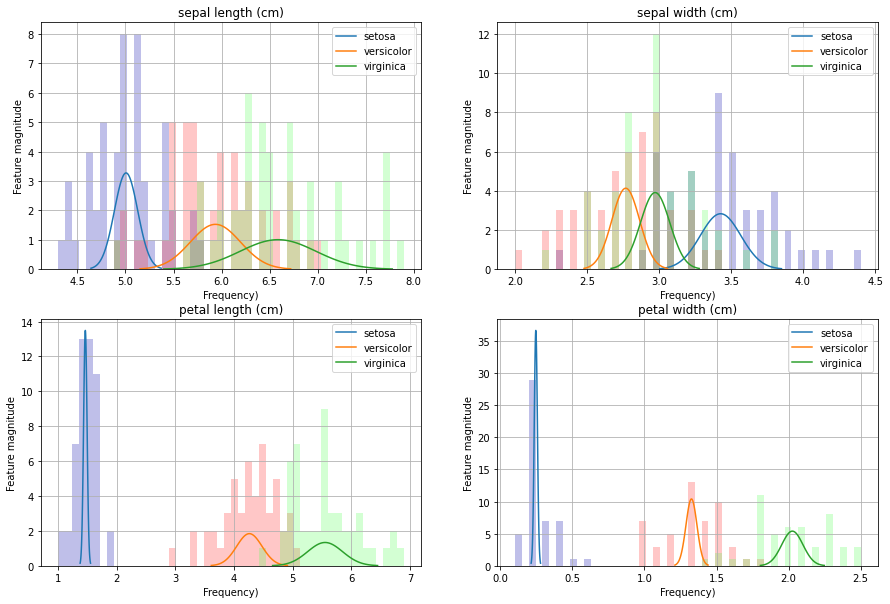

In [4]:
fig = plt.figure(figsize=(15,10)) 
for i in range(4):
    plt.subplot(2,2,i+1) 
    _, bins = np.histogram(iris.data[:, i], bins=50)
    x = np.linspace(GNB.theta_[0,i] - 3*GNB.sigma_[0,i], GNB.theta_[0,i] + 3*GNB.sigma_[0,i], 100)
    plt.hist(setosa[:, i], bins=bins, color=cm3(0), alpha=.25)
    plt.plot(x, stats.norm.pdf(x, GNB.theta_[0,i], GNB.sigma_[0,i]))
    x = np.linspace(GNB.theta_[1,i] - 3*GNB.sigma_[1,i], GNB.theta_[1,i] + 3*GNB.sigma_[1,i], 100)
    plt.hist(versicolor[:, i], bins=bins, color=cm3(1), alpha=.25)
    plt.plot(x, stats.norm.pdf(x, GNB.theta_[1,i], GNB.sigma_[1,i]))
    x = np.linspace(GNB.theta_[2,i] - 3*GNB.sigma_[2,i], GNB.theta_[2,i] + 3*GNB.sigma_[2,i], 100)
    plt.hist(virginica[:, i], bins=bins, color=cm3(2), alpha=.25)
    plt.plot(x, stats.norm.pdf(x, GNB.theta_[2,i], GNB.sigma_[2,i]))
    plt.grid()
    plt.title(iris.feature_names[i])
    plt.ylabel('Feature magnitude')
    plt.xlabel('Frequency)')
    plt.legend(['setosa', 'versicolor', 'virginica'], loc="best")

#### Try for different priors:

In [5]:
priors = [[0.4,0.4,0.2],[0.25,0.5,0.25],[0.5,0.25,0.25], [0.2,0.5,0.3],[0.1,0.6,0.3],[0.4,0.1,0.5]]
test_acc = []
train_acc = []
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
for pr in priors:
    gnb = GaussianNB(priors=pr).fit(X_train, y_train)
    test_acc.append(gnb.score(X_test,y_test))
    train_acc.append(gnb.score(X_train, y_train))

Text(0, 0.5, 'Accuracy')

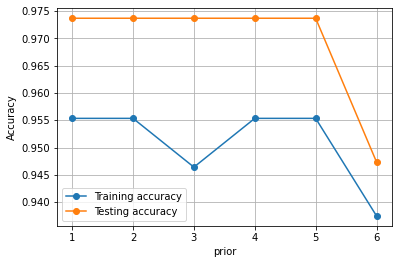

In [6]:
# Generate plots

plt.figure()
x_axis = range(1, len(test_acc) + 1)
plt.plot(x_axis,train_acc,'o-', label='Training accuracy')
plt.plot(x_axis,test_acc,'o-', label='Testing accuracy')
plt.grid()
plt.legend()
plt.xlabel('prior')
plt.ylabel('Accuracy')

### 3. BernoulliNB
Like MultinomialNB, this classifier is suitable for discrete data.
The difference is that while MultinomialNB works with occurrence counts
- BernoulliNB is designed for binary/boolean features.
- If data is not binary, internally Binarization preprocessing will happen
- Can deal with negative numbers

In [7]:
from sklearn.datasets import make_classification

In [8]:
X, Y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0,random_state=11)

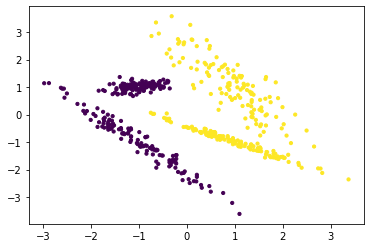

In [9]:
plt.scatter(X[:,0],X[:,1],c=Y,s=10, cmap='viridis')

In [10]:
from sklearn.model_selection import train_test_split
trainX,testX,trainY,testY = train_test_split(X,Y)

In [11]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB(binarize=0.0)

In [12]:
bnb.fit(trainX, trainY)

BernoulliNB()

In [13]:
bnb.score(testX,testY)

0.904

<ipython-input-14-16ded8a7a1be>:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='viridis', alpha=0.05)


Text(0.5, 1.0, 'BernoulliNB - Learned class boundaries')

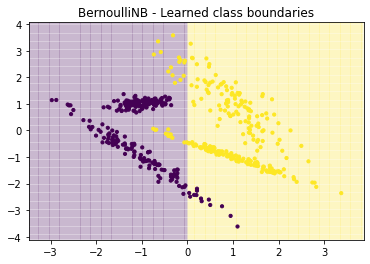

In [14]:
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = bnb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap='viridis', alpha=0.05)
plt.scatter(X[:,0],X[:,1],c=Y,s=10)
plt.title('BernoulliNB - Learned class boundaries')

### 3. MultinomialBN

In [15]:
from sklearn.naive_bayes import MultinomialNB

In [16]:
from sklearn.datasets import fetch_20newsgroups_vectorized

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

newsgroups_train = fetch_20newsgroups_vectorized(subset='train')

In [17]:
newsgroups_train = fetch_20newsgroups_vectorized(subset='train')
newsgroups_test = fetch_20newsgroups_vectorized(subset='test')

In [18]:
mnb = MultinomialNB(alpha=.01)


In [19]:
# the fitting is done using the TRAINING data
# Check the shapes before fitting
print(newsgroups_train.data.shape,newsgroups_train.target.shape)

(11314, 130107) (11314,)


In [20]:
# fit the model using the TRAINING data
mnb.fit(newsgroups_train.data, newsgroups_train.target)

MultinomialNB(alpha=0.01)

In [21]:
# the PREDICTION is done using the TEST data
pred = mnb.predict(newsgroups_test.data)

In [22]:
print('Training accuracy:', mnb.score(newsgroups_train.data,newsgroups_train.target))
print('Testing accuracy:', mnb.score(newsgroups_test.data,newsgroups_test.target))

Training accuracy: 0.9899239879794944
Testing accuracy: 0.8351035581518853
